In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [9]:
from sklearn.model_selection import train_test_split

x = data.drop('Class', axis=1)
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42)

In [10]:
missing_target_indices = np.isnan(y_train)

x_train = x_train[~missing_target_indices]
y_train = y_train[~missing_target_indices]

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = LogisticRegression()
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [19]:
mask = ~np.isnan(x_train).any(axis=1)
y_train = y_train[mask]
x_train = x_train[mask]

mask = ~np.isnan(x_test).any(axis=1)
x_test = x_test[mask]
y_test = y_test[mask]

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [26]:
nan_indices = np.argwhere(np.isnan(x_test)).flatten()
x_test = np.delete(x_test, nan_indices, axis =0)
y_test = np.delete(y_test, nan_indices)

In [27]:
x_test

array([[ 4.15050000e+04, -1.65265066e+01,  8.58497180e+00, ...,
        -2.01857525e+00, -1.04280417e+00,  1.10283362e+00],
       [ 4.42610000e+04,  3.39812064e-01, -2.74374524e+00, ...,
         4.09958027e-02,  1.02037825e-01,  1.72625520e+00],
       [ 3.54840000e+04,  1.39959027e+00, -5.90701288e-01, ...,
         1.14086454e-02,  4.63414166e-03, -2.29288721e-01],
       ...,
       [ 1.42491000e+05,  4.04414982e-02, -1.09736789e-01, ...,
         3.57844730e-01,  3.54379443e-01, -3.22723995e-01],
       [ 5.91570000e+04, -4.95047586e-01,  9.91480934e-01, ...,
         4.05292111e-02, -2.69775457e-01, -3.38876264e-01],
       [ 4.88640000e+04, -1.59048567e+00,  9.92415466e-01, ...,
         1.25749856e-01, -6.07225509e-01,  3.27027611e+00]])

In [29]:
x_train

array([[ 1.43352000e+05,  1.95504092e+00, -3.80782711e-01, ...,
         4.51682478e-02, -4.71447917e-02, -3.13288512e-01],
       [ 1.17173000e+05, -4.00975239e-01, -6.26942769e-01, ...,
        -3.70468822e-01, -1.44791686e-01, -1.69717237e-01],
       [ 1.49565000e+05,  7.25090164e-02,  8.20565650e-01, ...,
         2.06394866e-01,  7.02877702e-02, -3.05292340e-01],
       ...,
       [ 7.97950000e+04, -1.46608925e-01,  9.92946123e-01, ...,
        -1.21139194e-01, -1.96195328e-01, -3.37476933e-01],
       [ 8.79310000e+04, -2.94863809e+00,  2.35484929e+00, ...,
         4.96912107e-01,  3.35821632e-01, -3.49231307e-01],
       [ 7.63810000e+04,  1.23317435e+00, -7.84850501e-01, ...,
         1.21657270e-03,  3.85878912e-02,  9.85543469e-02]])

In [30]:
y_test

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
75723     0
252263    0
221246    0
81910     0
59490     0
Name: Class, Length: 56962, dtype: int64

In [31]:
y_train

223361    0
165061    0
238186    0
150562    0
138452    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 227845, dtype: int64

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

x = data.drop(columns=['Class'])
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

x_train.dropna(inplace=True)
x_test.dropna(inplace=True)
y_train = y_train[x_train.index]

model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:",accuracy)
print("precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)
print("confusion Matrix:")
print(confusion)

Accuracy: 0.9988764439450862
precision: 0.7023809523809523
Recall: 0.6020408163265306
F1 Score: 0.6483516483516483
confusion Matrix:
[[56839    25]
 [   39    59]]


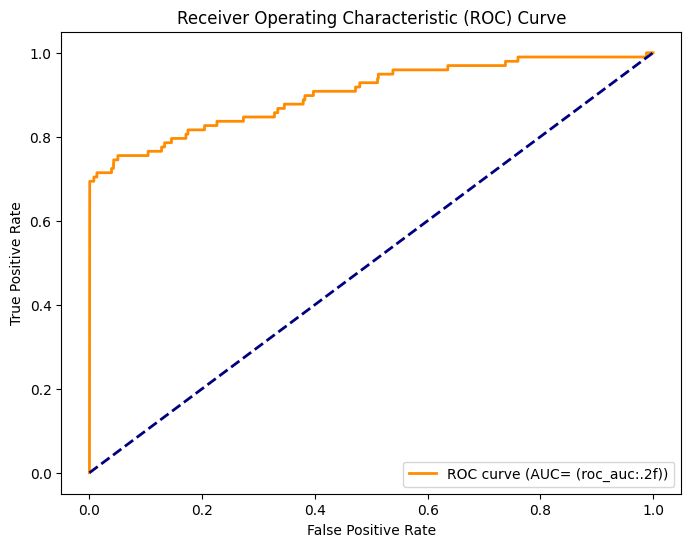

In [48]:
from sklearn.metrics import auc
y_probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC= (roc_auc:.2f))')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend (loc='lower right')
plt.show()

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

X = data.drop(columns=['Class'])
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy=0.5)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_resampled, y_train_resampled)

xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(x_train_resampled, y_train_resampled)

rf_y_pred = rf_model.predict(x_test)
xgb_y_pred = xgb_model.predict(x_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_confusion = confusion_matrix(y_test, rf_y_pred)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_confusion = confusion_matrix(y_test, xgb_y_pred)

print("Random Forest Model Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:")
print(rf_confusion)

print("\nXGBoost Model Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("Confusion Matrix:")
print(xgb_confusion)


Random Forest Model Metrics:
Accuracy: 0.9995435553526912
Precision: 0.8829787234042553
Recall: 0.8469387755102041
F1 Score: 0.8645833333333334
Confusion Matrix:
[[56853    11]
 [   15    83]]

XGBoost Model Metrics:
Accuracy: 0.9994382219725431
Precision: 0.8367346938775511
Recall: 0.8367346938775511
F1 Score: 0.8367346938775511
Confusion Matrix:
[[56848    16]
 [   16    82]]
